In [228]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt

In [229]:
data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [230]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Obtaining Data**

In [231]:
data = np.array(data)
m, n = data.shape #m = amount of rows, n = amount of columns + 1
np.random.shuffle(data)

#### Data used to develop model (not trained on) ###
#reduces chances of overfitting data
data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.0


### Data used to train model ###
data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.0
_,m_train = X_train.shape

In [232]:
#params
def init_params():
    W1 = np.random.rand(10,784) - 0.5
    b1 = np.random.rand(10,1) - 0.5
        
    W2 = np.random.rand(10,10) - 0.5
    b2 = np.random.rand(10,1) - 0.5
        
    return W1,b1,W2,b2

#softmax activation function
def softmax(Z):
    return np.exp(Z) / sum(np.exp(Z))

#utilizing the ReLU function to increase complexity of nn
def ReLU(Z):
    return np.maximum(Z,0)


def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2


def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y=one_hot_Y.T
    return one_hot_Y # returns the columns as examples
    
#derivative of ReLU
def deriv_ReLU(Z1):
    return Z1 > 0
    
#calculating the backward propagation of nn
def backward_prop(Z1, A1, Z2, A2, W2, X, Y):
    m = Y.size
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    
    return W1, b1, W2, b2

In [233]:
def get_predictions(A2):
    return np.argmax(A2,0)

def get_accuracy(prediction, Y):
    print(prediction, Y)
    return np.sum(prediction == Y) / Y.size

#optimizing function to get accuracy and iteration num of each iteration
def gradient_descent(X, Y, iterations, alpha):
    W1, b1, W2, b2 = init_params()
    
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W2, X, Y)
        W1,b1,W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            print("Accuracy: ", get_accuracy(get_predictions(A2), Y))
    return W1, b1, W2, b2
        

In [234]:

W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 1000, .1)

Iteration:  0
[1 3 1 ... 1 3 3] [7 5 9 ... 7 3 6]
Accuracy:  0.10807317073170732
Iteration:  10
[1 1 8 ... 1 9 0] [7 5 9 ... 7 3 6]
Accuracy:  0.19053658536585366
Iteration:  20
[1 1 7 ... 1 3 0] [7 5 9 ... 7 3 6]
Accuracy:  0.28560975609756095
Iteration:  30
[1 1 7 ... 1 0 0] [7 5 9 ... 7 3 6]
Accuracy:  0.364
Iteration:  40
[1 1 7 ... 1 0 0] [7 5 9 ... 7 3 6]
Accuracy:  0.4231951219512195
Iteration:  50
[1 1 7 ... 1 6 0] [7 5 9 ... 7 3 6]
Accuracy:  0.4696341463414634
Iteration:  60
[1 1 7 ... 1 6 6] [7 5 9 ... 7 3 6]
Accuracy:  0.5134878048780488
Iteration:  70
[1 1 7 ... 1 6 6] [7 5 9 ... 7 3 6]
Accuracy:  0.555219512195122
Iteration:  80
[1 1 7 ... 1 6 6] [7 5 9 ... 7 3 6]
Accuracy:  0.5947317073170731
Iteration:  90
[1 1 7 ... 1 6 6] [7 5 9 ... 7 3 6]
Accuracy:  0.6239756097560976
Iteration:  100
[1 1 7 ... 1 6 6] [7 5 9 ... 7 3 6]
Accuracy:  0.648829268292683
Iteration:  110
[1 1 7 ... 1 6 6] [7 5 9 ... 7 3 6]
Accuracy:  0.6676341463414635
Iteration:  120
[1 1 7 ... 1 6 6] [7 5 

In [235]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

**Test Prediction**


Prediction:  [1]
Label:  7


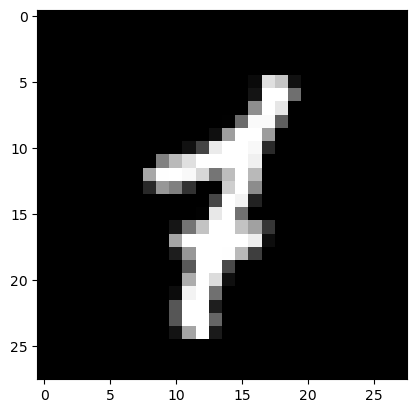

Prediction:  [8]
Label:  5


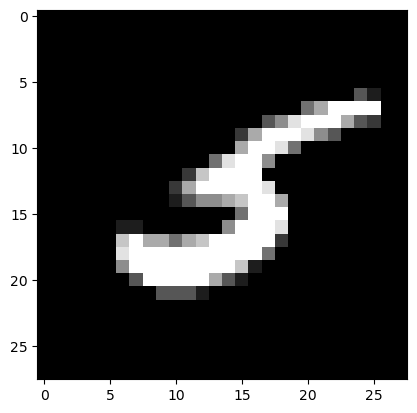

Prediction:  [7]
Label:  9


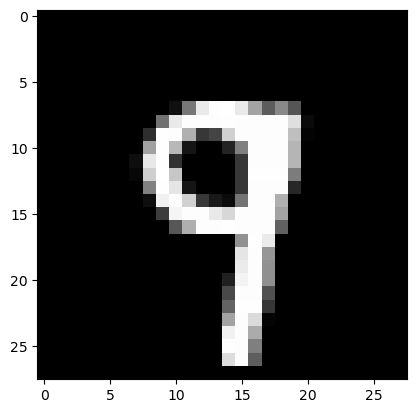

Prediction:  [9]
Label:  9


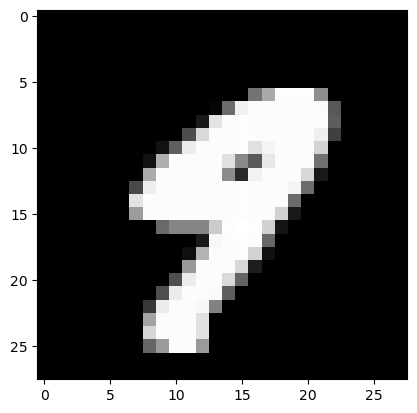

In [236]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

**Obtain the prediction percentage**


In [237]:
pred_dev = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(pred_dev, Y_dev)

[0 7 8 5 8 8 2 8 1 9 1 2 6 4 7 0 0 0 6 7 0 6 9 8 8 3 4 8 1 0 5 2 3 1 1 1 5
 0 7 2 4 3 3 9 9 1 9 0 0 1 9 7 6 0 0 7 7 2 8 9 9 8 7 6 6 4 8 3 6 0 5 2 0 2
 7 0 6 6 2 0 7 4 8 5 1 3 6 9 7 8 6 5 4 3 0 3 3 7 9 4 1 4 5 3 8 0 3 8 6 6 5
 1 7 1 3 7 8 3 1 0 1 3 0 7 0 9 0 0 8 0 7 4 7 8 5 9 3 1 8 3 3 5 1 3 3 7 6 4
 0 1 6 3 0 4 6 8 0 1 9 5 0 1 9 8 4 3 1 6 0 8 7 8 9 5 0 4 8 4 4 3 8 5 6 9 1
 3 3 0 8 4 8 0 1 4 3 0 3 1 7 8 9 4 4 8 0 9 3 9 5 9 1 0 7 1 5 3 9 7 3 6 5 0
 7 0 6 3 7 2 1 4 2 5 4 4 1 1 5 3 6 3 5 8 9 8 8 5 4 6 7 0 7 3 4 6 4 3 4 0 3
 4 9 9 8 4 1 3 2 5 2 8 9 4 2 1 6 8 9 4 7 6 1 4 8 7 9 6 9 0 2 6 4 3 1 4 8 3
 0 8 3 1 0 1 0 5 8 1 0 5 2 9 9 1 2 7 0 1 1 1 4 1 8 5 3 7 7 6 6 0 3 0 4 4 4
 2 2 6 3 1 4 1 9 4 2 4 5 4 3 8 3 7 2 0 7 9 0 9 4 0 1 6 5 8 8 1 8 3 2 8 4 5
 1 2 8 7 3 5 6 7 0 2 3 9 4 5 6 5 5 9 4 0 8 2 9 3 4 1 9 8 9 0 4 3 3 1 1 2 8
 3 6 7 8 8 0 9 4 4 0 3 2 4 4 5 0 1 8 6 9 8 3 2 0 8 8 2 5 9 4 9 8 3 7 6 8 0
 0 1 8 1 5 0 6 1 1 9 1 1 4 9 4 5 3 6 1 1 6 8 5 9 7 0 6 1 5 1 0 1 8 6 8 2 8
 7 4 5 1 2 5 3 7 7 7 6 1 

0.884